# Text Preprocessing

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.matutils import corpus2csc
from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = pd.read_csv('/content/pendidikan_kuliah.csv')
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1741468057623486714,Sun Dec 31 14:35:14 +0000 2023,0,Tak cuma uang pangkal cek rincian biaya kuliah...,1741468057623486714,NaN,NaN,in,"Ambon, Maluku",0,0,0,https://x.com/seprida_9/status/174146805762348...,82546208,seprida_9
1,1741466328626815214,Sun Dec 31 14:28:22 +0000 2023,0,kinda sad sm tahun baru kali ini cuz maybe thi...,1741466328626815214,NaN,NaN,in,T1 2021-present,0,0,0,https://x.com/zeusseonsu/status/17414663286268...,1114403244254552064,zeusseonsu
2,1741465043118797080,Sun Dec 31 14:23:15 +0000 2023,0,Tak cuma uang pangkal cek rincian biaya kuliah...,1741465043118797080,NaN,NaN,in,SBB,0,0,0,https://x.com/johncarmandolou/status/174146504...,2369856479,johncarmandolou
3,1741403355174552060,Sun Dec 31 13:09:59 +0000 2023,0,@jaeghyunj semoga aku dapet rezeki buat kuliah...,1741446605197529576,NaN,jaeghyunj,in,borderline,0,0,0,https://x.com/unschema/status/1741446605197529576,1687078914076930048,unschema
4,1741438938961858932,Sun Dec 31 12:39:46 +0000 2023,0,- yang bagus buat anak-anak gue nanti biar ana...,1741439001238937955,NaN,yepeoji,in,NaN,0,0,0,https://x.com/yepeoji/status/1741439001238937955,1329861231348310016,yepeoji


In [ ]:
import pandas as pd

# Baca file CSV yang sebelumnya dibuat
df = pd.read_csv('pendidikan_kuliah.csv', encoding='latin-1')

# Filter hanya kolom 'username' dan 'full text'
# Pastikan nama kolom persis seperti yang ada dalam dataset asli
filtered_df = df[['username', 'full_text']]

# Simpan hasil filter ke file CSV baru
filtered_df.to_csv('pendidikan_kuliah_filtered.csv', index=False, encoding='utf-8')

print("File CSV dengan kolom 'username' dan 'full text' telah disimpan sebagai pendidikan_kuliah_filtered.csv")
df_pendidikan_kuliah_filtered = pd.read_csv("pendidikan_kuliah_filtered.csv", encoding='latin-1')
df_pendidikan_kuliah_filtered.head()

File CSV dengan kolom 'username' dan 'full text' telah disimpan sebagai pendidikan_kuliah_filtered.csv


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,username,full_text
0,seprida_9,Tak cuma uang pangkal cek rincian biaya kuliah...
1,zeusseonsu,kinda sad sm tahun baru kali ini cuz maybe thi...
2,johncarmandolou,Tak cuma uang pangkal cek rincian biaya kuliah...
3,unschema,@jaeghyunj semoga aku dapet rezeki buat kuliah...
4,yepeoji,- yang bagus buat anak-anak gue nanti biar ana...


**Case Folding**

In [ ]:
# Fungsi case folding
def case_folding(text):
    if isinstance(text, str):
        return text.lower()
    return ""

# Membaca file CSV
df = pd.read_csv('pendidikan_kuliah_filtered.csv')

# Terapkan fungsi case folding
df['case_folding'] = df['full_text'].apply(case_folding)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,username,full_text,case_folding
0,seprida_9,Tak cuma uang pangkal cek rincian biaya kuliah...,tak cuma uang pangkal cek rincian biaya kuliah...
1,zeusseonsu,kinda sad sm tahun baru kali ini cuz maybe thi...,kinda sad sm tahun baru kali ini cuz maybe thi...
2,johncarmandolou,Tak cuma uang pangkal cek rincian biaya kuliah...,tak cuma uang pangkal cek rincian biaya kuliah...
3,unschema,@jaeghyunj semoga aku dapet rezeki buat kuliah...,@jaeghyunj semoga aku dapet rezeki buat kuliah...
4,yepeoji,- yang bagus buat anak-anak gue nanti biar ana...,- yang bagus buat anak-anak gue nanti biar ana...


**Punctuaction**

In [ ]:
# Fungsi untuk menghapus tanda baca
def remove_punctuation(text):
    return re.sub(r'[^a-z\s]', '', text)

# Terapkan fungsi remove punctuation
df['remove_punctuation'] = df['case_folding'].apply(remove_punctuation)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,username,full_text,case_folding,remove_punctuation
0,seprida_9,Tak cuma uang pangkal cek rincian biaya kuliah...,tak cuma uang pangkal cek rincian biaya kuliah...,tak cuma uang pangkal cek rincian biaya kuliah...
1,zeusseonsu,kinda sad sm tahun baru kali ini cuz maybe thi...,kinda sad sm tahun baru kali ini cuz maybe thi...,kinda sad sm tahun baru kali ini cuz maybe thi...
2,johncarmandolou,Tak cuma uang pangkal cek rincian biaya kuliah...,tak cuma uang pangkal cek rincian biaya kuliah...,tak cuma uang pangkal cek rincian biaya kuliah...
3,unschema,@jaeghyunj semoga aku dapet rezeki buat kuliah...,@jaeghyunj semoga aku dapet rezeki buat kuliah...,jaeghyunj semoga aku dapet rezeki buat kuliah ...
4,yepeoji,- yang bagus buat anak-anak gue nanti biar ana...,- yang bagus buat anak-anak gue nanti biar ana...,yang bagus buat anakanak gue nanti biar anaka...


**Tokenizing**

In [ ]:
nltk.download('punkt_tab')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# Proses tokenisasi menggunakan word_tokenize dari NLTK
def tokenize(text):
    """Melakukan tokenisasi teks."""
    return word_tokenize(text)

# Menambahkan kolom hasil tokenisasi ke DataFrame
df['tokenized_text'] = df['remove_punctuation'].apply(tokenize)
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,username,full_text,case_folding,remove_punctuation,tokenized_text
0,seprida_9,Tak cuma uang pangkal cek rincian biaya kuliah...,tak cuma uang pangkal cek rincian biaya kuliah...,tak cuma uang pangkal cek rincian biaya kuliah...,"[tak, cuma, uang, pangkal, cek, rincian, biaya..."
1,zeusseonsu,kinda sad sm tahun baru kali ini cuz maybe thi...,kinda sad sm tahun baru kali ini cuz maybe thi...,kinda sad sm tahun baru kali ini cuz maybe thi...,"[kinda, sad, sm, tahun, baru, kali, ini, cuz, ..."
2,johncarmandolou,Tak cuma uang pangkal cek rincian biaya kuliah...,tak cuma uang pangkal cek rincian biaya kuliah...,tak cuma uang pangkal cek rincian biaya kuliah...,"[tak, cuma, uang, pangkal, cek, rincian, biaya..."
3,unschema,@jaeghyunj semoga aku dapet rezeki buat kuliah...,@jaeghyunj semoga aku dapet rezeki buat kuliah...,jaeghyunj semoga aku dapet rezeki buat kuliah ...,"[jaeghyunj, semoga, aku, dapet, rezeki, buat, ..."
4,yepeoji,- yang bagus buat anak-anak gue nanti biar ana...,- yang bagus buat anak-anak gue nanti biar ana...,yang bagus buat anakanak gue nanti biar anaka...,"[yang, bagus, buat, anakanak, gue, nanti, biar..."
...,...,...,...,...,...
365,ndrafalett,kalo ini aku jadi kepikiran enaknya nanti Akmi...,kalo ini aku jadi kepikiran enaknya nanti akmi...,kalo ini aku jadi kepikiran enaknya nanti akmi...,"[kalo, ini, aku, jadi, kepikiran, enaknya, nan..."
366,leivramxy,@yusuf_dumdum Kuliah Gratis untuk Anak Prajuri...,@yusuf_dumdum kuliah gratis untuk anak prajuri...,yusufdumdum kuliah gratis untuk anak prajurit ...,"[yusufdumdum, kuliah, gratis, untuk, anak, pra..."
367,_mmustofaa,namun saat ini setelah proses pendidikan yang ...,namun saat ini setelah proses pendidikan yang ...,namun saat ini setelah proses pendidikan yang ...,"[namun, saat, ini, setelah, proses, pendidikan..."
368,ReginaAthalas,@hausrr Spess gua banget ini mah pendidikan ma...,@hausrr spess gua banget ini mah pendidikan ma...,hausrr spess gua banget ini mah pendidikan mat...,"[hausrr, spess, gua, banget, ini, mah, pendidi..."


**Normalization**

In [ ]:
# Normalization (contoh untuk bahasa Indonesia)
slang_dict = {'gak': 'tidak', 'ga': 'tidak', 'tdk': 'tidak', 'yg': 'yang', 'bgt': 'banget', 'gw': 'saya', 'jd': 'jadi', 'tak': 'tidak'}  # contoh

def normalize(tokens, slang_dict):
    return [slang_dict[word] if word in slang_dict else word for word in tokens]

df['tokens_normalized'] = df['tokenized_text'].apply(lambda x: normalize(x, slang_dict))
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,username,full_text,case_folding,remove_punctuation,tokenized_text,tokens_normalized
0,seprida_9,Tak cuma uang pangkal cek rincian biaya kuliah...,tak cuma uang pangkal cek rincian biaya kuliah...,tak cuma uang pangkal cek rincian biaya kuliah...,"[tak, cuma, uang, pangkal, cek, rincian, biaya...","[tidak, cuma, uang, pangkal, cek, rincian, bia..."
1,zeusseonsu,kinda sad sm tahun baru kali ini cuz maybe thi...,kinda sad sm tahun baru kali ini cuz maybe thi...,kinda sad sm tahun baru kali ini cuz maybe thi...,"[kinda, sad, sm, tahun, baru, kali, ini, cuz, ...","[kinda, sad, sm, tahun, baru, kali, ini, cuz, ..."
2,johncarmandolou,Tak cuma uang pangkal cek rincian biaya kuliah...,tak cuma uang pangkal cek rincian biaya kuliah...,tak cuma uang pangkal cek rincian biaya kuliah...,"[tak, cuma, uang, pangkal, cek, rincian, biaya...","[tidak, cuma, uang, pangkal, cek, rincian, bia..."
3,unschema,@jaeghyunj semoga aku dapet rezeki buat kuliah...,@jaeghyunj semoga aku dapet rezeki buat kuliah...,jaeghyunj semoga aku dapet rezeki buat kuliah ...,"[jaeghyunj, semoga, aku, dapet, rezeki, buat, ...","[jaeghyunj, semoga, aku, dapet, rezeki, buat, ..."
4,yepeoji,- yang bagus buat anak-anak gue nanti biar ana...,- yang bagus buat anak-anak gue nanti biar ana...,yang bagus buat anakanak gue nanti biar anaka...,"[yang, bagus, buat, anakanak, gue, nanti, biar...","[yang, bagus, buat, anakanak, gue, nanti, biar..."


**Stopword**

In [ ]:
#downloading dependencies
nltk.download('wordnet')
nltk.download('stopwords')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Fungsi untuk menghapus kata-kata tidak penting (stop words)
stop_words = set(stopwords.words('indonesian'))

def remove_stopwords(tokens):
    """Menghapus kata-kata tidak penting dari teks."""
    return [word for word in tokens if word.lower() not in stop_words]

# Menambahkan kolom hasil penghapusan kata-kata tidak penting ke DataFrame
df['remove_stopwords'] = df['tokens_normalized'].apply(remove_stopwords)
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,username,full_text,case_folding,remove_punctuation,tokenized_text,tokens_normalized,remove_stopwords
0,seprida_9,Tak cuma uang pangkal cek rincian biaya kuliah...,tak cuma uang pangkal cek rincian biaya kuliah...,tak cuma uang pangkal cek rincian biaya kuliah...,"[tak, cuma, uang, pangkal, cek, rincian, biaya...","[tidak, cuma, uang, pangkal, cek, rincian, bia...","[uang, pangkal, cek, rincian, biaya, kuliah, a..."
1,zeusseonsu,kinda sad sm tahun baru kali ini cuz maybe thi...,kinda sad sm tahun baru kali ini cuz maybe thi...,kinda sad sm tahun baru kali ini cuz maybe thi...,"[kinda, sad, sm, tahun, baru, kali, ini, cuz, ...","[kinda, sad, sm, tahun, baru, kali, ini, cuz, ...","[kinda, sad, sm, kali, cuz, maybe, this, year,..."
2,johncarmandolou,Tak cuma uang pangkal cek rincian biaya kuliah...,tak cuma uang pangkal cek rincian biaya kuliah...,tak cuma uang pangkal cek rincian biaya kuliah...,"[tak, cuma, uang, pangkal, cek, rincian, biaya...","[tidak, cuma, uang, pangkal, cek, rincian, bia...","[uang, pangkal, cek, rincian, biaya, kuliah, a..."
3,unschema,@jaeghyunj semoga aku dapet rezeki buat kuliah...,@jaeghyunj semoga aku dapet rezeki buat kuliah...,jaeghyunj semoga aku dapet rezeki buat kuliah ...,"[jaeghyunj, semoga, aku, dapet, rezeki, buat, ...","[jaeghyunj, semoga, aku, dapet, rezeki, buat, ...","[jaeghyunj, semoga, dapet, rezeki, kuliah, sam..."
4,yepeoji,- yang bagus buat anak-anak gue nanti biar ana...,- yang bagus buat anak-anak gue nanti biar ana...,yang bagus buat anakanak gue nanti biar anaka...,"[yang, bagus, buat, anakanak, gue, nanti, biar...","[yang, bagus, buat, anakanak, gue, nanti, biar...","[bagus, anakanak, gue, biar, anakanak, gue, pu..."
...,...,...,...,...,...,...,...
365,ndrafalett,kalo ini aku jadi kepikiran enaknya nanti Akmi...,kalo ini aku jadi kepikiran enaknya nanti akmi...,kalo ini aku jadi kepikiran enaknya nanti akmi...,"[kalo, ini, aku, jadi, kepikiran, enaknya, nan...","[kalo, ini, aku, jadi, kepikiran, enaknya, nan...","[kalo, kepikiran, enaknya, akmil, akpol, pendi..."
366,leivramxy,@yusuf_dumdum Kuliah Gratis untuk Anak Prajuri...,@yusuf_dumdum kuliah gratis untuk anak prajuri...,yusufdumdum kuliah gratis untuk anak prajurit ...,"[yusufdumdum, kuliah, gratis, untuk, anak, pra...","[yusufdumdum, kuliah, gratis, untuk, anak, pra...","[yusufdumdum, kuliah, gratis, anak, prajurit, ..."
367,_mmustofaa,namun saat ini setelah proses pendidikan yang ...,namun saat ini setelah proses pendidikan yang ...,namun saat ini setelah proses pendidikan yang ...,"[namun, saat, ini, setelah, proses, pendidikan...","[namun, saat, ini, setelah, proses, pendidikan...","[proses, pendidikan, berlanjut, kuliah, membac..."
368,ReginaAthalas,@hausrr Spess gua banget ini mah pendidikan ma...,@hausrr spess gua banget ini mah pendidikan ma...,hausrr spess gua banget ini mah pendidikan mat...,"[hausrr, spess, gua, banget, ini, mah, pendidi...","[hausrr, spess, gua, banget, ini, mah, pendidi...","[hausrr, spess, gua, banget, mah, pendidikan, ..."


In [ ]:
# Menyimpan hasil pemrosesan ke dalam file CSV
output_path = "/content/processed_pendidikan_kuliah_filtered_reduced.csv.csv"
df.to_csv(output_path, index=False)

print(f"Hasil pemrosesan telah disimpan ke {output_path}")

Hasil pemrosesan telah disimpan ke /content/processed_pendidikan_kuliah_filtered_reduced.csv.csv


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**TF-IDF**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


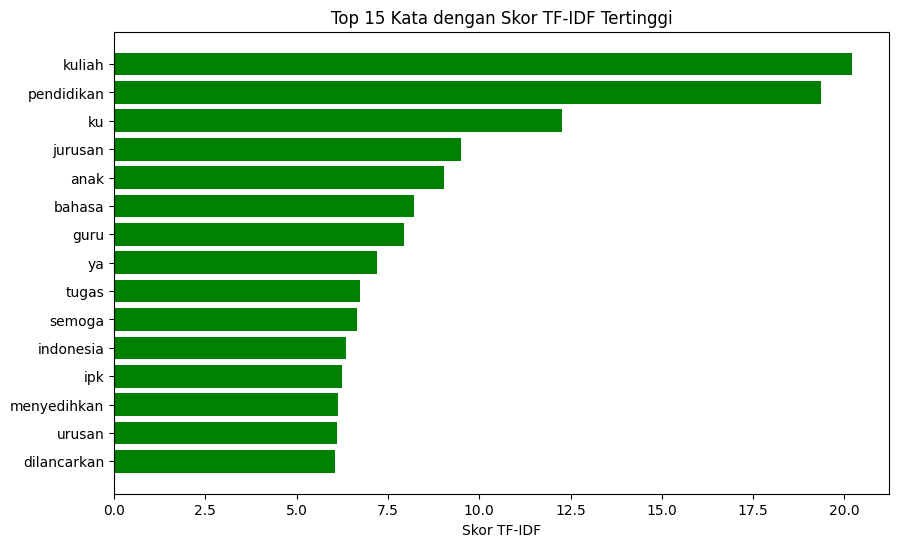

In [ ]:
!pip install scikit-learn
import numpy as np # Import numpy library and give it the alias np
from sklearn.feature_extraction.text import TfidfVectorizer # Import the TfidfVectorizer class from sklearn

# Assuming 'df' is your DataFrame containing the lemmatized text data in a column 'lemmatized_text'
# Join the lemmatized tokens back into strings before passing them to TfidfVectorizer
df['joined_text'] = df['remove_stopwords'].apply(lambda x: ' '.join(x)) # Apply ' '.join to each list element of the series. This converts the list of words into a string
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['joined_text']) # Pass the series with joined text (strings) to fit_transform
tfidf_terms = vectorizer.get_feature_names_out()

# Ambil skor TF-IDF dan kata-katanya
tfidf_scores = np.array(tfidf_matrix.sum(axis=0)).flatten() # Now np is defined and can be used
tfidf_words = tfidf_terms

# Urutkan kata berdasarkan skor TF-IDF
sorted_indices = np.argsort(tfidf_scores)[::-1] # Now np is defined and can be used
top_n = 15  # Jumlah kata teratas yang ingin ditampilkan

# Pilih top_n kata dan skor TF-IDF-nya
top_words = tfidf_words[sorted_indices][:top_n]
top_scores = tfidf_scores[sorted_indices][:top_n]

# Visualisasikan dengan bar plot
plt.figure(figsize=(10, 6))
plt.barh(top_words, top_scores, color='green')
plt.xlabel('Skor TF-IDF')
plt.title(f'Top {top_n} Kata dengan Skor TF-IDF Tertinggi')
plt.gca().invert_yaxis()  # Membalik urutan agar kata teratas berada di atas
plt.show()

In [ ]:
!pip install gensim
from gensim.corpora import Dictionary

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Create a dictionary from the preprocessed data
data = df['remove_stopwords']
dictionary = Dictionary(data)

# Filter out words that appear in fewer than 5 documents or more than 50% of the documents
dictionary.filter_extremes(no_below=5, no_above=0.5)

bow_corpus = [dictionary.doc2bow(text) for text in data]

# Train the LDA model
num_topics = 5
ldamodel = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')

# Get the topics
topics = ldamodel.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=False)

# Print the topics
for topic_id, topic in enumerate(topics, start=1):
    print("Topic: {}".format(topic_id))
    words = [word for word, prob in topic[1]]
    print("Words: {}".format(words))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic: 1
Words: ['anak', 'keluarga', 'biaya', 'ganjar', 'miskin', 'ganjarpeduligenerasiri', 'mahasiswa', 'kalo', 'kampus', 'gratis']
Topic: 2
Words: ['ya', 'banget', 'kerja', 'lulus', 'orang', 'guru', 'tp', 'sekolah', 'aja', 'gua']
Topic: 3
Words: ['jurusan', 'bahasa', 'iya', 'guru', 'inggris', 'lemah', 'gaji', 'collegemenfess', 'ya', 'keren']
Topic: 4
Words: ['ku', 'tugas', 'semoga', 'ipk', 'menyedihkan', 'urusan', 'telkomindonesia', 'membahagiakan', 'elevatingyourfuture', 'dilancarkan']
Topic: 5
Words: ['dana', 'gue', 'lo', 'nya', 'silahkan', 'pola', 'psikologi', 'modal', 'usaha', 'link']


**Diagram Py LDA**

In [ ]:
!pip install pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Visualisasi menggunakan pyLDAvis
pyLDAvis.enable_notebook()
lda_vis = gensimvis.prepare(ldamodel, bow_corpus, dictionary)
pyLDAvis.display(lda_vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Wordcloud**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


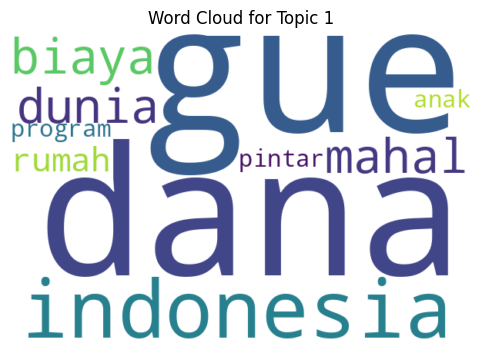

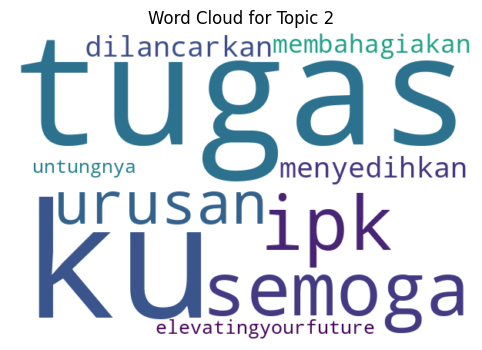

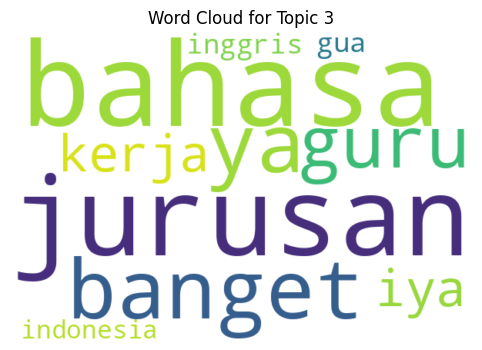

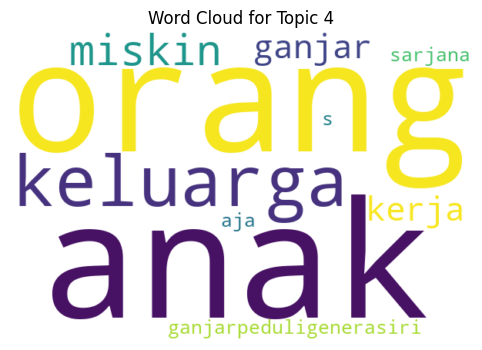

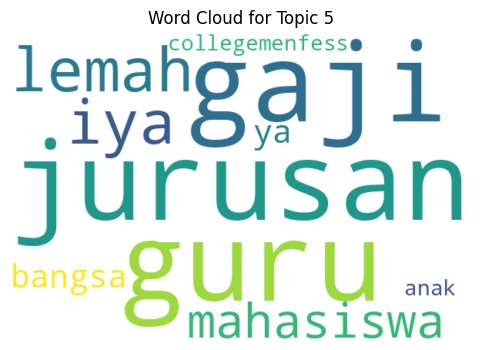

In [ ]:
# prompt: buatkan wordcloud berdasarkan diagram py lda

# Assuming 'topics' is the variable containing the LDA topics as obtained in your code.

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word clouds for each topic
def generate_wordclouds(topics):
    for topic_id, topic in enumerate(topics, start=1):
        word_string = " ".join([word for word, prob in topic[1]])  # Concatenate words with space
        wordcloud = WordCloud(width=600, height=400, background_color='white').generate(word_string)

        plt.figure(figsize=(8, 4))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"Word Cloud for Topic {topic_id}")
        plt.show()


# Assuming your topics variable is the same as in the original code
# Call the function with the topics obtained from the LDA model
generate_wordclouds(topics)

**Number Of Topic**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


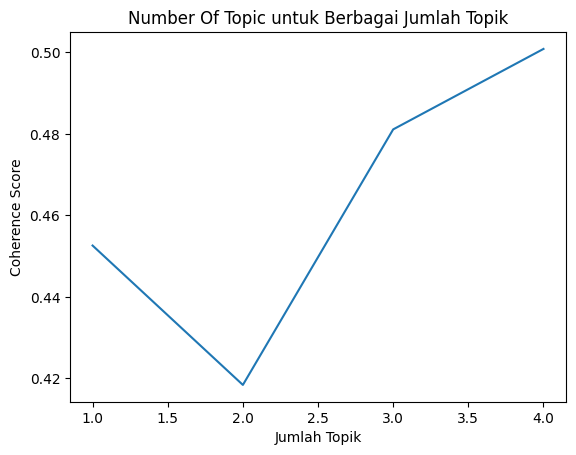

Topik yang optimal: 4


In [ ]:
from gensim.models import CoherenceModel

# Fungsi untuk menghitung Coherence Score dengan jumlah topik yang bervariasi
def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=20, alpha='auto', eta='auto')
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# Menentukan rentang jumlah topik yang akan diuji
start = 1  # Jumlah topik minimum
limit = 5  # Jumlah topik maksimum
step = 1  # Interval antar jumlah topik

# Menghitung coherence values untuk berbagai jumlah topik
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=bow_corpus, texts=data, start=start, limit=limit, step=step)

# Visualisasi hasil
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Jumlah Topik")
plt.ylabel("Coherence Score")
plt.title("Number Of Topic untuk Berbagai Jumlah Topik")
plt.show()

# Menampilkan jumlah topik dengan coherence score terbaik
optimal_num_topics = x[coherence_values.index(max(coherence_values))]
print(f"Topik yang optimal: {optimal_num_topics}")

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

# Menghitung Coherence Score per topik
topic_coherence_scores = []
for topic_id in range(num_topics):
    topic_words = [word for word, _ in ldamodel.show_topic(topic_id, topn=10)]
    coherence_model_topic = CoherenceModel(topics=[topic_words], texts=data, dictionary=dictionary, coherence='c_v')
    topic_coherence_scores.append(coherence_model_topic.get_coherence())

# Menampilkan Coherence Score per topik
for topic_id, coherence in enumerate(topic_coherence_scores):
    print(f"Coherence Score untuk Topik {topic_id + 1}: {coherence}")  # Tambahkan 1 pada topic_id

# Menghitung keseluruhan Coherence Score model
coherence_model_lda = CoherenceModel(model=ldamodel, texts=data, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

# Menampilkan Coherence Score untuk model LDA
print(f"Coherence Score untuk model LDA: {coherence_lda}")

# Menambahkan perhitungan rata-rata Coherence Score per topik
average_coherence = sum(topic_coherence_scores) / len(topic_coherence_scores) if topic_coherence_scores else 0
print(f"Rata-rata Coherence Score per Topik: {average_coherence}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score untuk Topik 1: 0.3415426438469998
Coherence Score untuk Topik 2: 0.4859333338180713
Coherence Score untuk Topik 3: 0.7301201960649123
Coherence Score untuk Topik 4: 0.9996777947839437
Coherence Score untuk Topik 5: 0.2797300635769789
Coherence Score untuk model LDA: 0.4166712313786419
Rata-rata Coherence Score per Topik: 0.5674008064181812


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


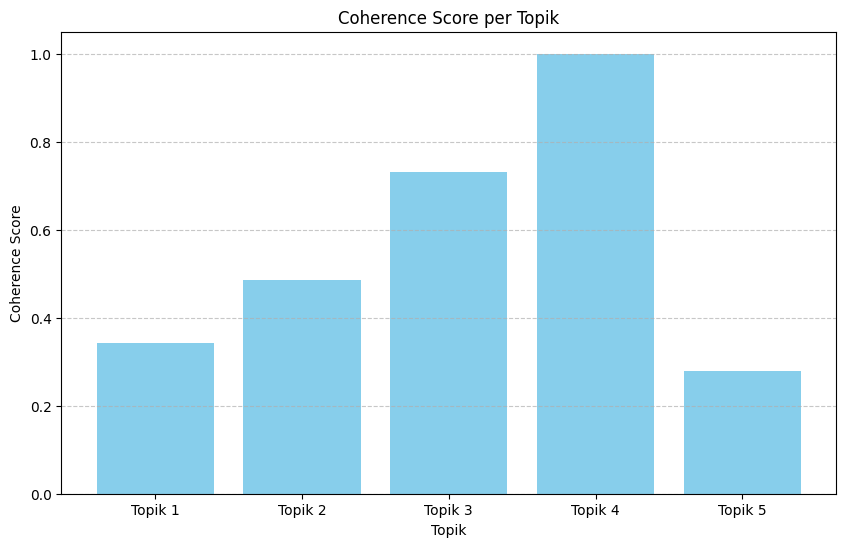

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi Coherence Score per topik
plt.figure(figsize=(10, 6))
plt.bar(range(len(topic_coherence_scores)), topic_coherence_scores, color='skyblue')  # Tetap gunakan range dari 0
plt.xlabel("Topik")
plt.ylabel("Coherence Score")
plt.title("Coherence Score per Topik")
plt.xticks(range(len(topic_coherence_scores)), [f"Topik {i+1}" for i in range(len(topic_coherence_scores))])  # Tambahkan 1 untuk setiap label
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()